# 6.5 Unsupervised Machine Learning

## Index
1. Importing Libraries and Data
2. Data Cleaning
3. Elbow Technique
4. K-means Clustering
5. Descriptive Statistics

### 1. Importing Libraries and Data

In [4]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # K-means algorithm
import pylab as pl 
import warnings

In [5]:
%matplotlib inline

In [6]:
warnings.filterwarnings("ignore")

In [7]:
# Path to data folder
path = r'C:\Users\justi\OneDrive\Desktop\Class work\Achievement 6\Data\Prepared Data'

In [8]:
#Import Gun violence data
gv = pd.read_csv(os.path.join(path, 'Gun Violence Clean.csv'))

###  2. Data Cleaning

In [9]:
gv.shape

(239677, 9)

In [10]:
gv.head()

,Unnamed: 0,incident_id,date,state,city_or_county,number_killed,number_injured,latitude,longitude
0,0,461105,1/1/2013,Pennsylvania,Mckeesport,0,4,40.3467,-79.8559
1,1,460726,1/1/2013,California,Hawthorne,1,3,33.9090,-118.3330
2,2,478855,1/1/2013,Ohio,Lorain,1,3,41.4455,-82.1377
3,3,478925,1/5/2013,Colorado,Aurora,4,0,39.6518,-104.8020
4,4,478959,1/7/2013,North Carolina,Greensboro,2,2,36.1140,-79.9569


In [11]:
# Dropping Columns not needed
gv_2 = gv.drop(columns = ['Unnamed: 0', 'incident_id', 'date', 'state', 'city_or_county'])

In [12]:
# Dropping Nan's from latitude/longitude columns
gv_2 = gv_2.dropna()

In [13]:
# Check
gv_2.isnull().sum()

number_killed     0
number_injured    0
latitude          0
longitude         0
dtype: int64

### 3. The elbow technique

In [14]:
num_cl = range(1, 10) # Defines range for potential clusters
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the assigned range

In [15]:
score = [kmeans[i].fit(gv_2).score(gv_2) for i in range(len(kmeans))]

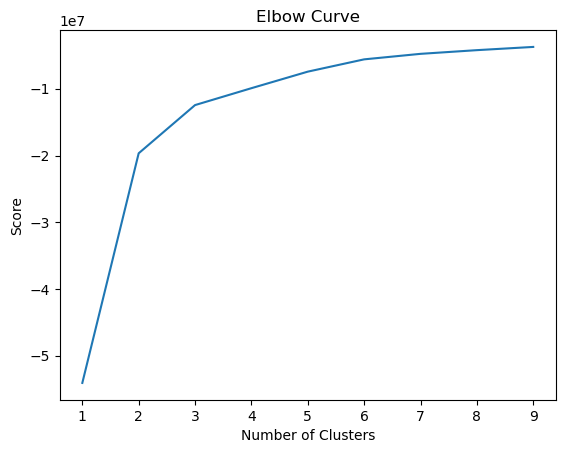

In [16]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 4. K-means Clustering

In [17]:
# Creating hte k-means object
kmeans = KMeans(n_clusters=4)

In [18]:
# Fitting the k-means to the data
kmeans.fit(gv_2)

KMeans(n_clusters=4)

### I will be using 4 clusters as that is when the highest jumps are past and the curve appears to be flattening out

In [19]:
# adding column to see clusters
gv_2['clusters'] = kmeans.fit_predict(gv_2)

In [20]:
# Check
gv_2.head()

,number_killed,number_injured,latitude,longitude,clusters
0,0,4,40.3467,-79.8559,1
1,1,3,33.9090,-118.3330,2
2,1,3,41.4455,-82.1377,3
3,4,0,39.6518,-104.8020,0
4,2,2,36.1140,-79.9569,3


In [21]:
# Check
gv_2['clusters'].value_counts()

3    104813
1     57786
0     39366
2     29789
Name: clusters, dtype: int64

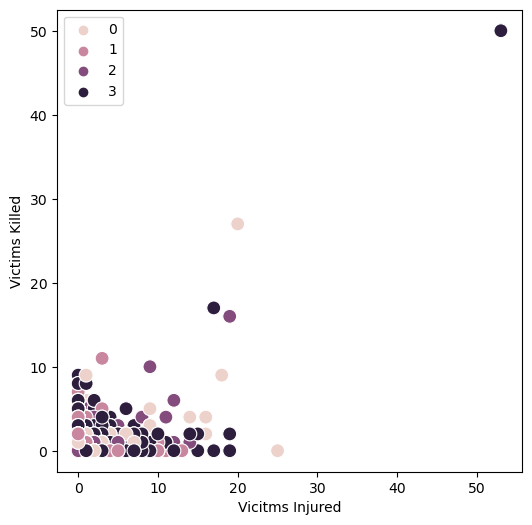

In [22]:
# Victims Killed and Victims injured cluster plot
plt.figure(figsize=(6,6))
ax = sns.scatterplot(x=gv_2['number_injured'], y=gv_2['number_killed'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Vicitms Injured')
plt.ylabel('Victims Killed')
plt.show()

### In this chart the clusters are showing that the second cluster contains the most points which shows that more victims are injured due to gun violence than killed.

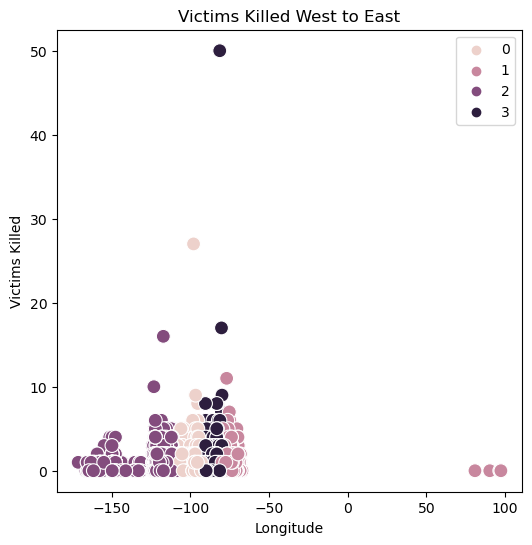

In [23]:
plt.figure(figsize=(6,6))
ax = sns.scatterplot(x=gv_2['longitude'], y=gv_2['number_killed'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Longitude')
plt.ylabel('Victims Killed')
plt.title('Victims Killed West to East')
plt.show()

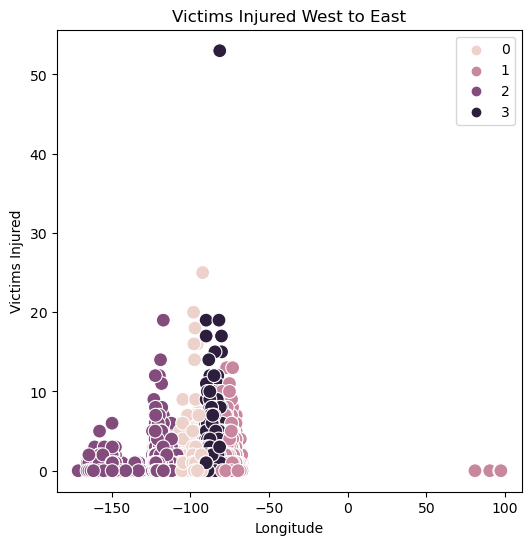

In [24]:
plt.figure(figsize=(6,6))
ax = sns.scatterplot(x=gv_2['longitude'], y=gv_2['number_injured'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Longitude')
plt.ylabel('Victims Injured')
plt.title('Victims Injured West to East')
plt.show()

## The clusters in this chart are showing that the thrid cluster is also the one with the most points and it is showing that there are more victims killed and injured on the west side of the country

### 5. Descriptive Statistics

In [25]:
gv_2.loc[gv_2['clusters'] == 3, 'clusters'] = 'dark purple'
gv_2.loc[gv_2['clusters'] == 2, 'clusters'] = 'light purple'
gv_2.loc[gv_2['clusters'] == 0, 'clusters'] = 'light pink'
gv_2.loc[gv_2['clusters'] == 1 , 'clusters'] = 'pink'

In [26]:
gv_2.groupby('clusters').agg({'number_killed':['mean', 'median'],
                             'number_injured':['mean', 'median'],
                             'latitude':['mean', 'median'],
                             'longitude':['mean', 'median']})

number_killed        number_injured          latitude           \
                      mean median           mean median       mean   median   
clusters                                                                      
dark purple       0.244035    0.0       0.549827    0.0  36.294902  36.0976   
light pink        0.279302    0.0       0.422116    0.0  35.645450  35.1094   
light purple      0.313270    0.0       0.418275    0.0  39.375715  37.7336   
pink              0.195082    0.0       0.481587    0.0  40.169155  40.4471   

               longitude             
                    mean     median  
clusters                             
dark purple   -85.321499  -85.53910  
light pink    -96.743041  -95.90355  
light purple -120.371463 -119.74100  
pink          -75.582066  -75.69350

### The descriptive statistics are showing that the hypothesis made previosly is accurate and that there are usually more victims injured than killed from gun violence incidents


# For future analysis it would be interesting to look into a more geographic approach and look further into city's instead of just states as well as finding data to look into arrests for these incidents.

In [27]:
# Exporting Data with clusters
gv_2.to_csv(os.path.join(path, 'Gun Violence Clean (Tableau Version).csv'))